In [29]:
# Voting classifiers
# Importing all the libraries
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score

# Generating test and train data
X, y  = make_moons (n_samples=500, noise=0.30, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
lr_clf = LogisticRegression(solver="lbfgs", random_state=42)
svc_clf = SVC(gamma ="scale", random_state=42)
rdm_clf = RandomForestClassifier(n_estimators =100, random_state=42)
svc_clf_prob = SVC(gamma ="scale", probability  = True, random_state=42)
vot_clf_hard = VotingClassifier(estimators=[('lr',lr_clf),
                                       ('svc',svc_clf),
                                       ('rdm',rdm_clf)],
                           voting='hard')
vot_clf_soft = VotingClassifier(estimators=[('lr',lr_clf),
                                       ('svc',svc_clf_prob),
                                       ('rdm',rdm_clf)],
                           voting='soft')


models_hardVoting = (lr_clf,svc_clf,rdm_clf,vot_clf_hard)
models_softVoting = (lr_clf,svc_clf_prob,rdm_clf,vot_clf_soft)

def getModelAccurcy(models, head):
  print(head)
  for model in models:
    model.fit (X_train,y_train)
    y_predict = model.predict(X_test)
    print(model.__class__.__name__, accuracy_score(y_test,y_predict))


getModelAccurcy(models_hardVoting, "Accuracy Comparision with Hard voting Aggregation")
getModelAccurcy(models_softVoting, "\nAccuracy Comparision with soft voting Aggregation")

Accuracy Comparision with Hard voting Aggregation
LogisticRegression 0.864
SVC 0.896
RandomForestClassifier 0.896
VotingClassifier 0.912

Accuracy Comparision with soft voting Aggregation
LogisticRegression 0.864
SVC 0.896
RandomForestClassifier 0.896
VotingClassifier 0.92


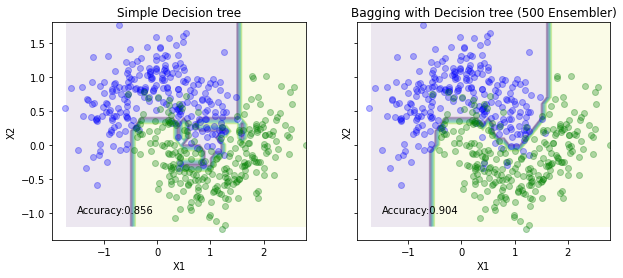

In [119]:
# Bagging Ensemble
from sklearn.ensemble import BaggingClassifier						# Importing libraries
from sklearn.tree import DecisionTreeClassifier
import numpy as np
import matplotlib.pyplot as plt

bag_clf=BaggingClassifier(base_estimator=DecisionTreeClassifier(), 	# Bagging model
                             n_estimators=500, 						# No of decision trees=500
                             max_samples=100, 						# Training sample during bagging=100
                             bootstrap= True, 						# Random sampling with replacement
                             n_jobs=-1, 							# consume all propcessors
                             random_state=42)
bag_clf.fit(X_train,y_train)										# Bagging model with Decision tree
y_predict = bag_clf.predict(X_test)
bag_acc = accuracy_score(y_test,y_predict)

tree_clf = DecisionTreeClassifier(random_state=42)					# Simple Decision tree
tree_clf.fit(X_train,y_train)
y_predict = tree_clf.predict(X_test)
tree_acc = accuracy_score(y_test,y_predict)

min_x1 = np.min(X[:,0])												# Values to plot the boundaries
max_x1 = np.max(X[:,0])
min_x2 = np.min(X[:,1])
max_x2 = np.max(X[:,1])

def plotDecisionBound(model, title,axes,acc):						# Function to create contour plot and 
  plt.sca(axes)														# Decision boundaries
  x1s = np.round(np.linspace(min_x1, max_x1, 100),1)				
  x2s = np.round(np.linspace(min_x2, max_x2, 100),1)
  x1,x2 = np.meshgrid(x1s,x2s)
  X_new = np.c_[x1.ravel(),x2.ravel()]
  predict = model.predict(X_new).reshape(x1.shape)
  plt.contourf (x1,x2,predict,alpha=0.1)
  plt.contour(x1,x2,predict,alpha=0.3)
  plt.plot(X[:,0][y==0],X[:,1][y==0],"bo",alpha=0.3)
  plt.plot(X[:,0][y==1],X[:,1][y==1],"go",alpha=0.3)
  plt.xlabel("X1")
  plt.ylabel("X2")
  plt.title(title)
  plt.text(-1.5,-1,f"Accuracy:{acc}")

fix, axes = plt.subplots(ncols=2, figsize=(10,4), sharey=True)		
plotDecisionBound(tree_clf, "Simple Decision tree",axes[0],	tree_acc)
plotDecisionBound(bag_clf, "Bagging with Decision tree (500 Ensembler)", axes[1],bag_acc)			